In [1]:
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data = np.loadtxt("sensors.csv", dtype=np.str, delimiter=",")
Time = data[:, 0]
label = data[:,-1]
data = data[:, 1:-1][1:]

In [3]:
fire_index = np.where(label == '3')[0]
cook_index = np.where(label == '2')[0]
norm_index = np.where(label == '0')[0]
print(cook_index.size, fire_index.size, norm_index.size)

146 75 240


In [4]:
normaldata = data[  np.where(label == '0')[0][:-1] ]

In [5]:
normaldata = normaldata.astype(np.float)

In [6]:
res = []
for i in range(4):
    res.append( np.percentile(normaldata[:, i], [0.1, 0.9])  )
    
res

[array([15612.856, 16108.088]),
 array([8343.254, 9138.   ]),
 array([23007.656, 23207.272]),
 array([54363.464, 54627.816])]

In [7]:
label_index = np.where(label != '1')[0]

In [8]:
label_index = label_index[:-1]

In [9]:
label = label.astype(np.float)[label_index]

In [10]:
data = data.astype(np.float)[label_index]

In [11]:
maximum = np.max(data, axis=0)

In [12]:
maximum

array([18420., 12611., 26102., 58686.])

In [13]:
from sklearn.preprocessing import normalize
data = normalize(data, norm="max", axis=0, copy=True, return_norm=False)

In [14]:
from sklearn.cluster import KMeans

estimator = KMeans(n_clusters=3,
    init='k-means++', 
    n_init=10, 
    max_iter=300, 
    tol=0.0001, 
    precompute_distances='auto', 
    verbose=0, 
    random_state=None, 
    copy_x=True, 
    n_jobs=1, 
    algorithm='auto')#构造聚类器

estimator.fit(data)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

In [15]:
# cook_index = np.where(label_pred == 3)[0]
fire_index = np.where(label_pred == 2)[0]
cook_index = np.where(label_pred == 1)[0]
norm_index = np.where(label_pred == 0)[0]
print(cook_index.size, fire_index.size, norm_index.size)
print("centroids:",centroids)

297 31 132
centroids: [[0.77634159 0.58050692 0.98477186 0.93912053]
 [0.91315325 0.77987498 0.91070243 0.93131321]
 [0.87689573 0.74146738 0.92988549 0.3668408 ]]


In [25]:
color_dict = {
    0: 'b',
    1: 'g',
    2: 'r'
}
pre_colors = [  color_dict[pred] for pred in label_pred ]

In [26]:
color_dict1 = {
    0: 'g',
    2: 'b',
    3: 'r'
}
label_colors = [ color_dict1[pred] for pred in label ]

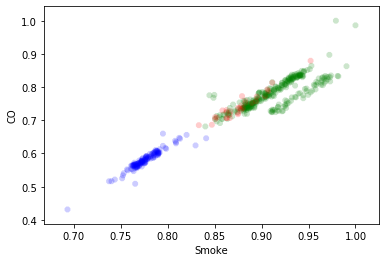

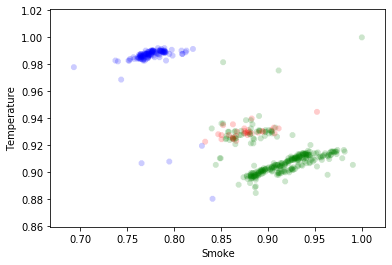

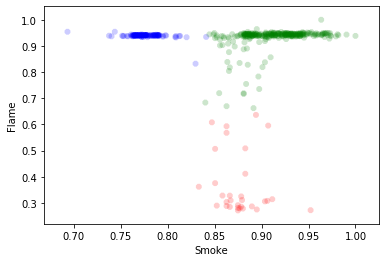

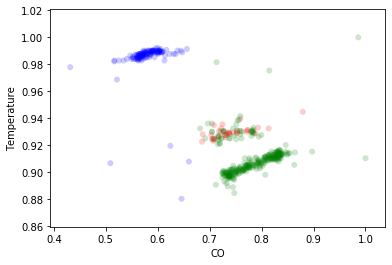

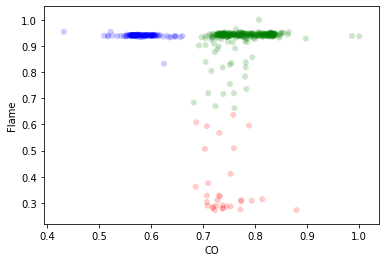

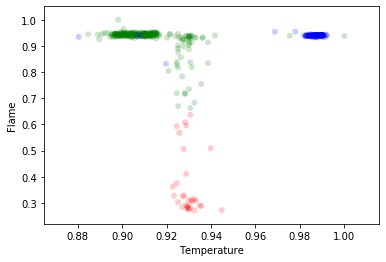

In [37]:
label_dict ={
    0: 'Smoke',
    1: 'CO',
    2: 'Temperature',
    3: 'Flame'
}
from itertools import combinations
combine = combinations(range(4),2)
for comb in combine:
    x, y = comb
    fig1 = plt.figure(1,figsize=(6,4))
    plt.scatter(data[:, x], data[:, y], c=pre_colors, cmap='brg', s=40, alpha=0.2, marker='8', linewidth=0)
    plt.xlabel(label_dict[x])
    plt.ylabel(label_dict[y])
    plt.show()

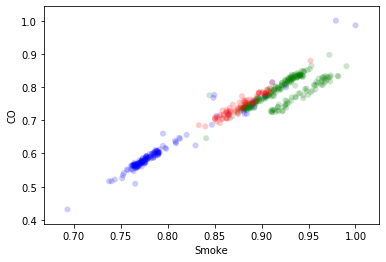

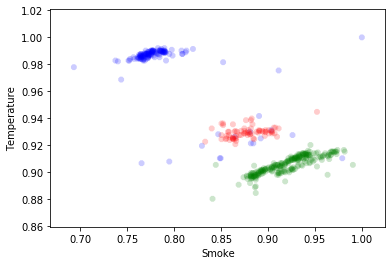

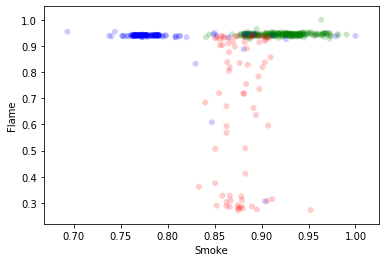

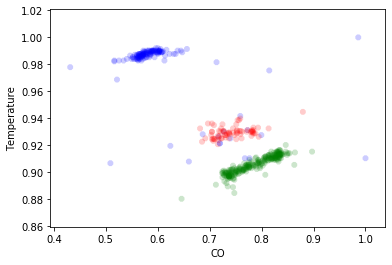

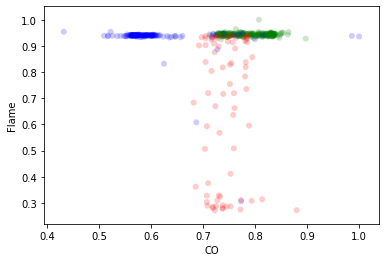

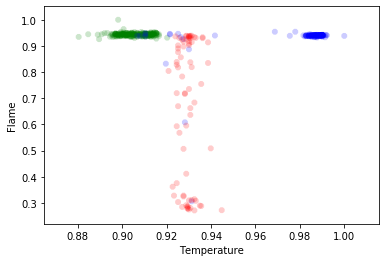

In [38]:
from itertools import combinations
combine = combinations(range(4),2)
for comb in combine:
    x, y = comb
    fig1 = plt.figure(1,figsize=(6,4))
    plt.scatter(data[:, x], data[:, y], c=label_colors, cmap='brg', s=40, alpha=0.2, marker='8', linewidth=0)
    plt.xlabel(label_dict[x])
    plt.ylabel(label_dict[y])
    plt.show()

In [17]:
import joblib
joblib.dump(estimator, 'my_model.pkl')

['my_model.pkl']

In [18]:
model = joblib.load('my_model.pkl') 

In [19]:
maximum = np.array([20000,10000,10000])

In [20]:
model.predict([[20000,20000,10000],] / maximum)

ValueError: Incorrect number of features. Got 3 features, expected 4

In [ ]:
def save_events(event):
    """
    This function fetches content from mysql RDS instance
    """
    now = int(round(time.time()*1000))
    Time = time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(now/1000))
    CO = event['CO']
    Smoke = event['Smoke']
    T = event['T']
    Flame = event['Flame']
    
    result = []
    conn = pymysql.connect(rds_host, user=name, passwd=password, db=db_name, connect_timeout=2)
    with conn.cursor() as cur:
        cur.execute("""insert into sensor (Time, CO, Smoke, T, Flame) values( '%s', %d, %d, %d, %d)""" 
        % (Time, int(CO), int(Smoke), int(T), int(Flame)))
        cur.execute("""select * from sensor""")
        conn.commit()
        cur.close()
        for row in cur:
            result.append(list(row))
        print('Data from RDS...')
        print(result)